**Problem Statment** 

We are to understand the relationship our other variables have with the price of gold and then predict the price of gold after training our model 

This shows how the SPX,USO,SLV and EUR/USD exchange relates to the price of gold 

SPX= S&P 500(combination of 500 companies that are publicly traded)

GLD = price of gold for different dates

USO = united states oil price

SLV = silver price Value

EUR/USD = exchange rate 

In [6]:
#importing our dependncies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
gold_dataframe =pd.read_csv('/content/gld_price_data.csv')

In [8]:
gold_dataframe.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
#btw, to print the last 5 rows,we use the tail fuction
gold_dataframe.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
gold_dataframe.shape

(2290, 6)

In [11]:
gold_dataframe.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
gold_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_dataframe.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
gold_dataframe.drop_duplicates()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [15]:
#to find the correlation between our variables 
correlation= gold_dataframe.corr()

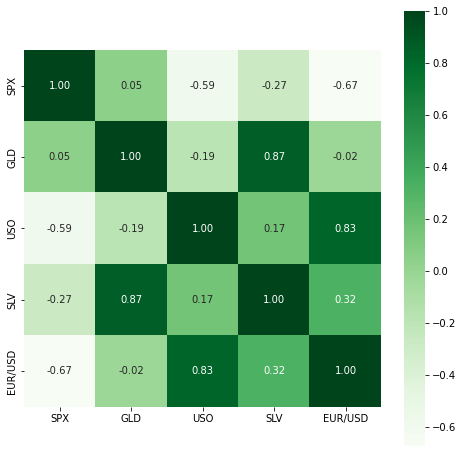

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True,cbar=True,fmt='.2f',square=True,cmap='Greens')

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


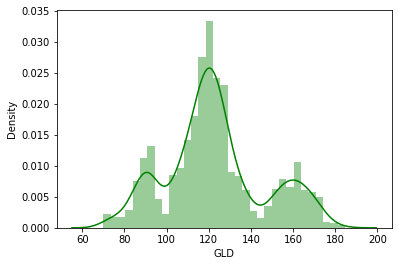

In [18]:
#to check the distribution of the gold price 

#distplot = distribution plot 
sns.distplot(gold_dataframe['GLD'],color='Green')

Splitting our data 

In [19]:
X=gold_dataframe.drop(['Date','GLD'],axis=1)
Y=gold_dataframe.GLD

In [20]:
print(Y)
print(X)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


splitting our data set 


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X_train.shape,X_test.shape)

(1832, 4) (458, 4)


fitting our data


In [23]:
regressor = RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
#to get our root mean square score
# we need to predict first 

training_prediction = regressor.predict(X_train)
training_prediction_accuracy_kinda = metrics.r2_score(Y_train,training_prediction)
print(training_prediction_accuracy_kinda)

0.9984714672271991


In [25]:
test_data_prediction= regressor.predict(X_test)
root_mean_error= metrics.r2_score(Y_test,test_data_prediction)
print(root_mean_error)

0.9884598989105603


to compare the data 

In [26]:
#Y_test has to be converted into a list
Y_test =list(Y_test)

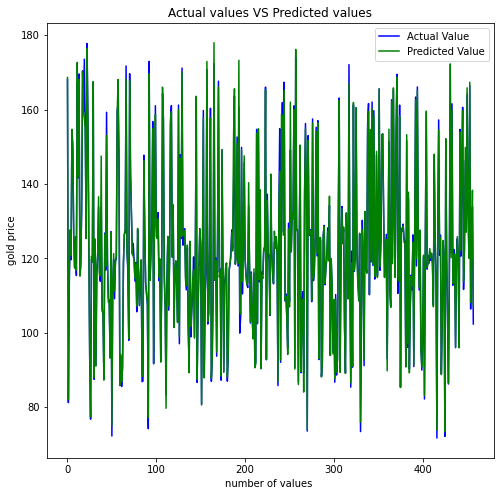

In [27]:
plt.figure(figsize=(8,8))
plt.plot(Y_test,color= 'blue', label='Actual Value' )
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual values VS Predicted values')
plt.xlabel('number of values ')
plt.ylabel('gold price')
plt.legend()
plt.show()

As can be seen from this plot, the actual prices and the predicted prices are very close and in most cases exact to the whole number 

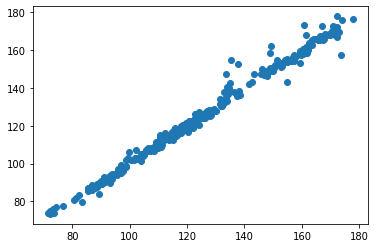

In [28]:
plt.scatter(Y_test,test_data_prediction)

the scatter plot also shows little difference in the two plotted prices 

now that we've got our model, we can predict the price of gold based on different data 

for example 


In [29]:
new_data = (1333.25,71.029999,15.717,1.464)

new_data = np.asarray(new_data)
new_data = new_data.reshape(1,-1)

new_price = regressor.predict(new_data)
print(new_price)

[86.78889906]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


lets say we wanted to predict the price of gold on 11/6/2022 based on the training of our model

In [30]:
new_data = (3900.86,122.6,21.9,1.05)

new_data = np.asarray(new_data)
new_data = new_data.reshape(1,-1)

new_price = regressor.predict(new_data)
print(new_price)

[132.94389981]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
